# Walkthrough 2D

In [2]:
from gait3d.gaitanalysis_top import RecordingTop
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
files = [file for file in Path("F:/Michael/Data/analysis_pdwk1_batch1_top/").iterdir() if file.name.endswith('filtered.csv') and file.name != '195_F8-20_220809_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv']
files

[WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-16_220809_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-16_220810_OTR001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-16_220811_OTE001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-20_220809_OTT002DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-20_220810_OTE001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/195_F8-20_220811_OTR001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 WindowsPath('F:/Michael/Data/analysis_pdwk1_batch1_top/206_F1-89_220809_OTEDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.cs

In [4]:
objects = [] 
for file in files:
    try:
        obj = RecordingTop(filepath=Path(file), recorded_framerate=30)
        print(obj.metadata)
        obj.run(intrinsic_camera_calibration_filepath="G:/Konstantin/Data/Checkerboard_Calibrations/Top_checkerboard_intrinsic_calibration_results.p")
        obj.get_freezing_bouts()
        obj.run_gait_analysis()
        obj.export_as_session()
        print(obj.session_df)
        objects.append(obj)    
    except OverflowError:
        print('could not be normalized\n')

{'recording_date': '220809', 'animal': '195_F8-16', 'paradigm': 'OTT001DLC', 'cam': 'resnet152'}
1.0 0.9623658902662738
1.0 0.9941630996720218
Normalized using coverage: 0.95 and likelihood: 0.9904999999999999

                       mean_value total_count mean_x_position mean_duration  \
average_speed_cm_per_s   6.895425         NaN             NaN           NaN   
immobility                    NaN         165       11.591375      0.766263   
gait_disruption               NaN         108       12.175325      2.432407   
freezing                      NaN          22        7.890978      3.360606   
freezing_of_gait              NaN          15        8.297962      3.813333   
gait                          NaN         477       16.047668      1.013627   

                       total_count_facing_open mean_duration_facing_open  \
average_speed_cm_per_s                     NaN                       NaN   
immobility                                 145                  0.693563   
gait_di

In [5]:
objects[0].session_df

,mean_value,total_count,mean_x_position,mean_duration,total_count_facing_open,mean_duration_facing_open,mean_x_position_facing_open
average_speed_cm_per_s,6.895425,NaN,NaN,NaN,NaN,NaN,NaN
immobility,NaN,165,11.591375,0.766263,145,0.693563,12.515452
gait_disruption,NaN,108,12.175325,2.432407,95,2.365614,13.11876
freezing,NaN,22,7.890978,3.360606,19,2.912281,8.496821
freezing_of_gait,NaN,15,8.297962,3.813333,14,3.52381,8.640521
gait,NaN,477,16.047668,1.013627,310,1.115484,18.302675


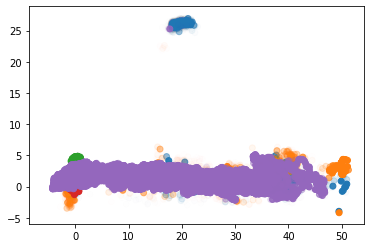

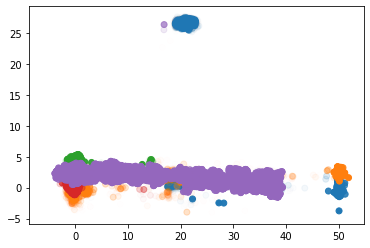

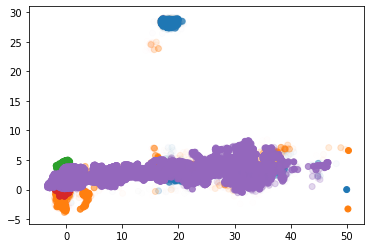

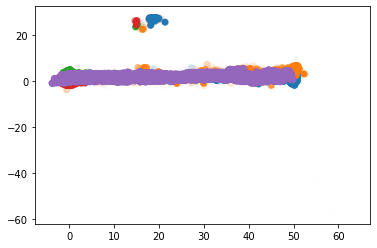

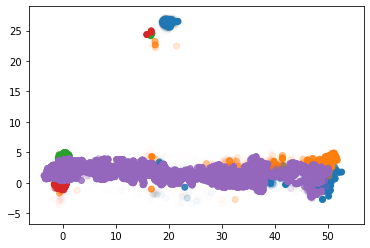

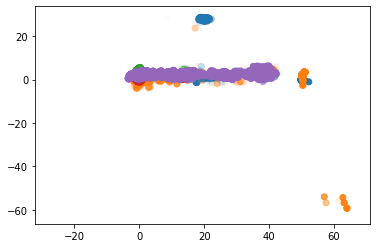

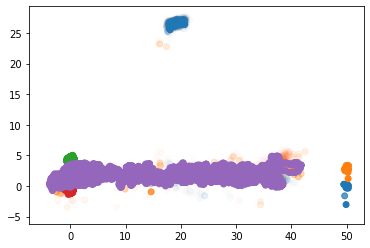

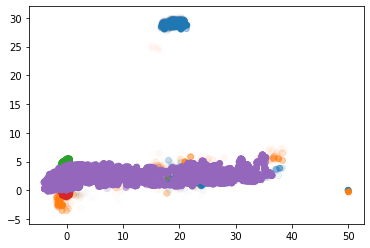

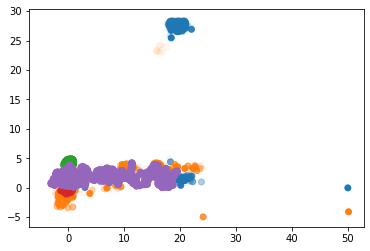

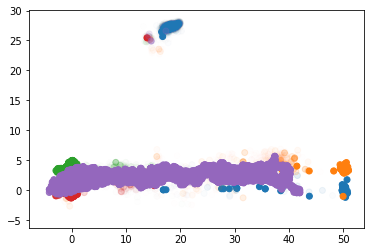

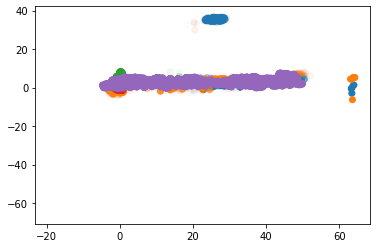

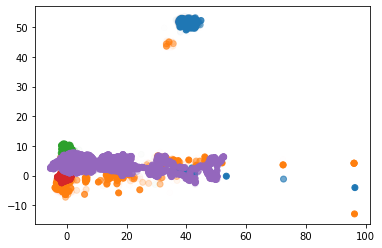

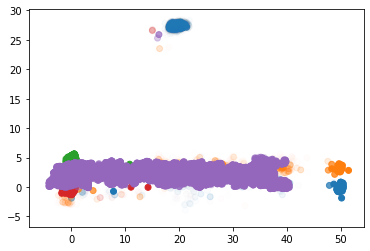

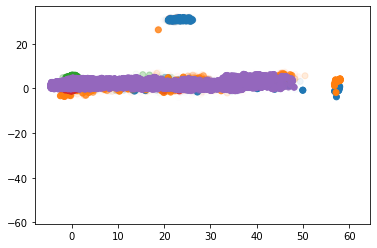

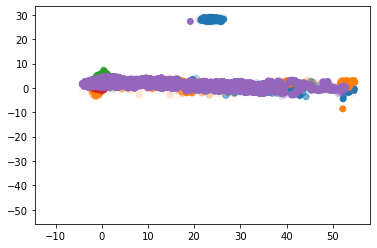

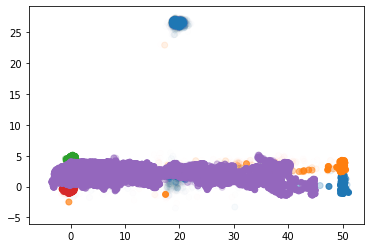

In [6]:
for bot in objects:
    fig = plt.figure()
    for corner in ['MazeCornerOpenLeft', 'MazeCornerOpenRight', 'MazeCornerClosedRight', 'MazeCornerClosedLeft']:
        plt.scatter(bot.bodyparts[corner].df['x'], bot.bodyparts[corner].df['y'], alpha = bot.bodyparts[corner].df['likelihood'])
    plt.scatter(bot.bodyparts['Snout'].df['x'], bot.bodyparts['Snout'].df['y'], alpha = bot.bodyparts['Snout'].df['likelihood'])
    plt.show()

In [7]:
len(files), len(objects)

(26, 16)

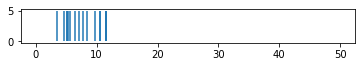

In [11]:
parameter = 'immobility'

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for obj in objects:
    try:
        plt.vlines(obj.session_df.loc[parameter, 'mean_x_position'], 0, 5)
    except:
        continue
plt.show()

266


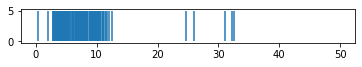

In [12]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in bot.immobility_bouts.events:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=1)
print(len(bot.immobility_bouts.events))
plt.show()